In [1]:
# Data reading Libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Hopkins
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# Scaling Libraries
from sklearn.preprocessing import StandardScaler

# KMeans Clustering Libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Hierarchical Clustering Libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# General Lirary
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)

# 1. Read data

In [2]:
# Reading data from csv file
country_df = pd.read_csv('Country-data.csv')
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country_df.shape

(167, 10)

In [4]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


##### Observations
- We can see there are outliers realted to some variables which we can examine further using plotting

In [5]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


##### Observations
- There are no missing values in the given dataset as well as the data type associated with each variables seems good according to the values they hold

# 2. Clean the data

##### Variables `exports` , `health` and `imports` are in percentage value we need to convert them to actual value using `gdpp`

In [6]:
# Convert exports
country_df['exports']=country_df['exports']/100 * country_df['gdpp']

In [7]:
# Convert health
country_df['health']=country_df['health']/100 * country_df['gdpp']

In [8]:
# Convert exports
country_df['imports']=country_df['imports']/100 * country_df['gdpp']

In [9]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# 3. Data Visualiztion

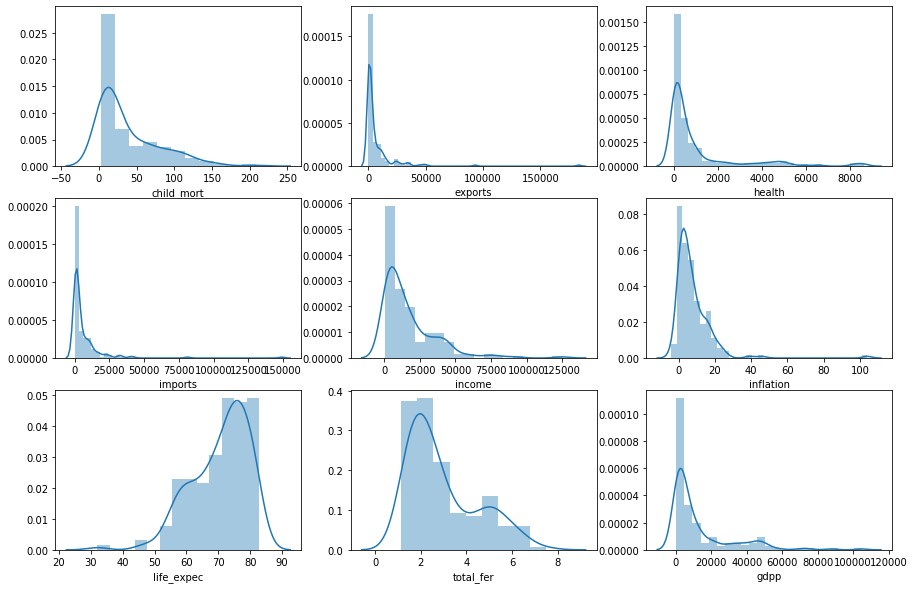

In [10]:
plt.figure(figsize=(15,10))
feature = country_df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(country_df[i[1]])

##### Observations
1. `Child Mortality` plot shows that the `child mortality rate per 1000 live births of children(>5) highly ranges from 10 to 150 which is approx 1% to 15% per 1000 live births of children(>5)` and this seems bad.
2. Most of the countries seems to `spend around 0 to 2000` in their currency on `health per capita` and `very less countries seems to spend more than 4000 per capita` in their currency.
3. For most of the countries the `imports` and `exports` figure almost `seems to equal per capita`.
4. High number of people seems to have `income of 10000 to 53000` in most countries.
5. In most of the countries the `inflation rate seems to be low which is the result of low demand for goods and services`.
6. The `life expectency of new born child` with current mortality rate `ranges between age 50 to age 82` which seems to be moderate but not good.
7. The `number of children` to be `born to a woman according to the plot is 2-3` in most countries, than `4-5` for some and than `5-7` for left over countries `which could lead to faster growth in population`.
8. For most countries `GDPP` which is the GDP/Total Population of Country approximately `ranges between 5000 to 20000 and so on`.

# 4. Outliers Treatment

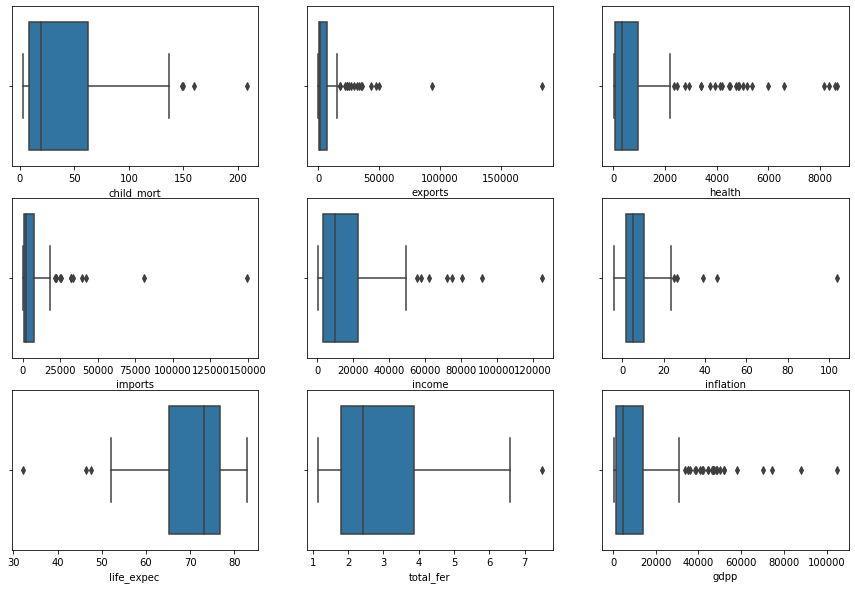

In [11]:
plt.figure(figsize=(15,10))
feature = country_df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country_df[i[1]])

##### Observations
1. Each and every variables seems to have low or higher or both range of outliers.
2. Export, Health and GDPP are the variables with highest high range outliers.
3. life_expec is the only low range outliers but very less.
4. Some other variables with high range outliers are child_mort, imports, income, inflation and total_fer


#### 1. We are not going to apply capping to higher range outliers in `child_mort` and `inflation` because those outliers will help us to understand about the countries graph realted to these varibales and accordingly to distribuite required aid money.<br>
#### 2. Lower `gdpp` could also help us in finding countries in need of financial aid. So we are going to remove only higher range outlier under this variable.<br>
#### 3. Other variables like `exports` `imports` `health` and `income` are having much higher quartile range which could impact the result and also they are of no use due to much higher range than required or normal values. Hence, we will only remove the higher range outliers in these variables.

In [12]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [13]:
# capping lower range: child_mort and inflation
inflation_q1 = country_df['inflation'].quantile(0.01)
child_q1 = country_df['child_mort'].quantile(0.01)

country_df['child_mort'][country_df['child_mort'] <= child_q1] = child_q1
country_df['inflation'][country_df['inflation'] <= inflation_q1] = inflation_q1

In [14]:
# capping higher range: gdpp
gdpp_q2 = country_df.gdpp.quantile(0.95)

country_df['gdpp'][country_df['gdpp'] >= gdpp_q2] = gdpp_q2

In [15]:
# capping higher range: exports, imports, health and income
export_q2 = country_df['exports'].quantile(0.95)
import_q2 = country_df['imports'].quantile(0.95)
health_q2 = country_df['health'].quantile(0.95)
income_q2 = country_df['income'].quantile(0.99)

country_df['exports'][country_df['exports'] >= export_q2] = export_q2
country_df['imports'][country_df['imports'] >= import_q2] = import_q2
country_df['health'][country_df['health'] >= health_q2] = health_q2
country_df['income'][country_df['income'] >= income_q2] = income_q2

In [16]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.271257,5783.114656,954.012480,5140.089474,16857.550898,7.798194,70.555689,2.947964,11998.826347
std,40.327869,8580.053847,1453.426636,6696.210005,17957.012855,10.553699,8.893172,1.513848,15158.213199
min,2.800000,1.076920,12.821200,0.651092,609.000000,-2.348800,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,31385.100000,4966.701000,24241.560000,84374.000000,104.000000,82.800000,7.490000,48610.000000


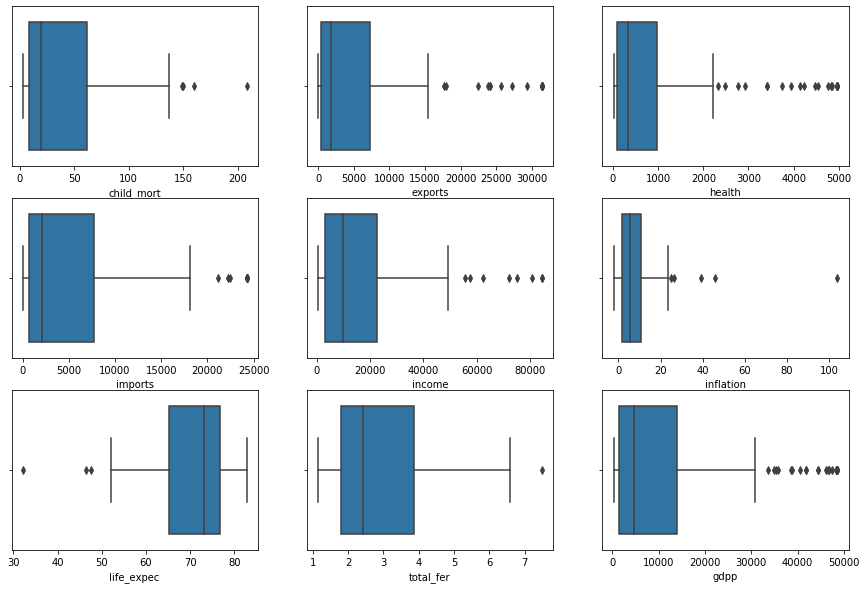

In [17]:
# plotting outlier
plt.figure(figsize=(15,10))
feature = country_df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country_df[i[1]])

#### Now the values in different variables to be fine

# 4. Clustering by checking Hopkins value and Rescaling

In [18]:
# Check the hopkins
def hopkins(X):
    d = X.shape[1]
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [19]:
hopkins(country_df.drop('country', axis = 1))

0.8907310861434037

In [20]:
country_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [21]:
# rescaling
scaler = StandardScaler()

country_df_nColumns = country_df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
    
country_df_scaled = scaler.fit_transform(country_df_nColumns)
country_df_scaled.shape

(167, 9)

In [22]:
# converting scaled data to Dataframe
country_df_scaled = pd.DataFrame(country_df_scaled)

# renaming columns
country_df_scaled.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

country_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.669581,-0.629435,-0.732729,-0.851668,0.156035,-1.619092,1.902882,-0.757362
1,-0.538993,-0.542172,-0.473489,-0.472182,-0.386946,-0.314406,0.647866,-0.859973,-0.523321
2,-0.272870,-0.475838,-0.530017,-0.560152,-0.221053,0.788991,0.670423,-0.038404,-0.498838
3,2.007831,-0.418960,-0.588935,-0.543087,-0.612045,1.387733,-1.179234,2.128151,-0.560376
4,-0.695682,-0.027134,-0.150685,0.306422,0.125254,-0.604273,0.704258,-0.541946,0.013312


In [23]:
# merging 'country' column with 'country_df_scaled' dataframe
country = country_df[['country']]

# inserting 'country' column at specific column index[0] position 
index = 0
country_df_scaled.insert(loc=index, column='country', value=country)

In [24]:
country_df_scaled.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291537,-0.669581,-0.629435,-0.732729,-0.851668,0.156035,-1.619092,1.902882,-0.757362
1,Albania,-0.538993,-0.542172,-0.473489,-0.472182,-0.386946,-0.314406,0.647866,-0.859973,-0.523321
2,Algeria,-0.272870,-0.475838,-0.530017,-0.560152,-0.221053,0.788991,0.670423,-0.038404,-0.498838
3,Angola,2.007831,-0.418960,-0.588935,-0.543087,-0.612045,1.387733,-1.179234,2.128151,-0.560376
4,Antigua and Barbuda,-0.695682,-0.027134,-0.150685,0.306422,0.125254,-0.604273,0.704258,-0.541946,0.013312


## 4.1 KMeans Clustering

#### Elbow Curve and Silhouette Score

Elbow Curve value:
 [[2, 778.8396508561245], [3, 499.524180760914], [4, 420.01217391997307], [5, 342.62528068571334], [6, 297.4355347821916], [7, 266.6389593170868], [8, 236.22008698647534], [9, 208.1949852937624], [10, 195.09680387175942]] 

Elbow Curve


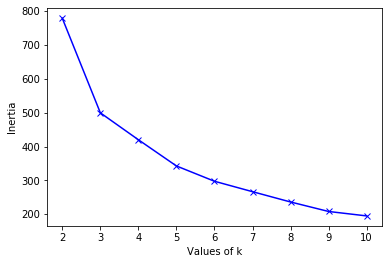

In [25]:
# choosing k value using 'Silhoutte Score' and 'Elbow Curve'

# Elbow Curve / Sum of Squared Distances
ssd=[]
range_of_clusters = range(2,11)
for k in range_of_clusters:
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(country_df_scaled.drop('country', axis=1))
    
    ssd.append([k,kmeans.inertia_])
    
print("Elbow Curve value:\n",ssd,"\n")
ssd = pd.DataFrame(ssd)
    
# printing and ploting 'Elbow Curve'
print("Elbow Curve")
plt.plot(range_of_clusters,ssd[1],'bx-')
plt.xlabel("Values of k")
plt.ylabel("Inertia")
plt.show()

##### Observations
- We can see that the elbow point hover over k as 3 and after the plot does not make any drastic bend. `Hence, according to the Elbow Curve output (line plot) we will choose k=3`.
- But to finalize value of k we will check Silhoutte Score.

In [26]:
# Silhoutte Score
range_of_clusters = range(2,11)

for k in range_of_clusters:
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(country_df_scaled.drop('country', axis=1))
    
    ss = silhouette_score(country_df_scaled.drop('country', axis=1), kmeans.labels_)
    ss = ss.round(2)
# printing'silhouette_score' values
    print("For k={0}, the Silhoette Score is {1}".format(k, ss))

For k=2, the Silhoette Score is 0.5
For k=3, the Silhoette Score is 0.43
For k=4, the Silhoette Score is 0.43
For k=5, the Silhoette Score is 0.4
For k=6, the Silhoette Score is 0.31
For k=7, the Silhoette Score is 0.28
For k=8, the Silhoette Score is 0.28
For k=9, the Silhoette Score is 0.32
For k=10, the Silhoette Score is 0.29


##### Observations
- After analysing Silhoutte Score we can say that though `k=3 has second highest Silhouette Score` will go with it, due to the moderate significane.

### 4.1.1 Modelling using KMeans Algorithm

In [27]:
# Final model using k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(country_df_scaled.drop('country', axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [29]:
# assigning labels
country_df['labels'] = kmeans.labels_
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,2


In [30]:
country_df.labels.value_counts()

2    82
0    48
1    37
Name: labels, dtype: int64

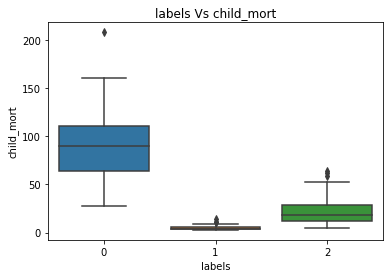

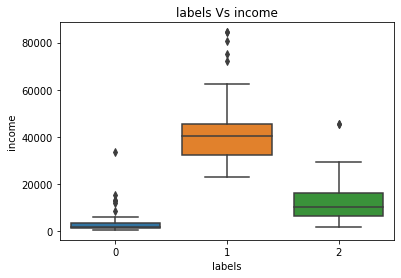

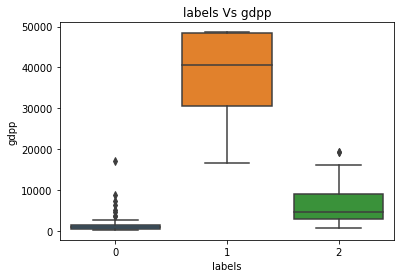

In [31]:
# Box Plot
# Plot 1
sns.boxplot(x='labels',y='child_mort', data=country_df)
plt.title('labels Vs child_mort')
plt.show()

# Plot 2
sns.boxplot(x='labels',y='income', data=country_df)
plt.title('labels Vs income')
plt.show()

# Plot 3 
sns.boxplot(x='labels',y='gdpp', data=country_df)
plt.title('labels Vs gdpp')
plt.show()

##### Observations
- Plot 1 indicates that Countries under label 0 has higher moratlity rate with average approx 98-100 child mortality per 1000 child(age <5) followed by label 2 and label 1 Countries with average child moratlity 20-25 and 8-10 over 1000 child (age <5) respectively.
- Plot 2 indicates the Countries under label 0 have lower income per capita i.e. approx average income 1000 followed by Countries under the label 1 and 2 having average income per captia as approx 41000 and 10000.
- Plot 3 indicates that the Countries under label 0 have lower gdpp with approx gdpp 1000-2000 followed by Countries under the label 2 and 1 having average gdpp as approx 5000 and 40000.

#### After observing the result generated from KMeans model we could say that Countries under the label 2 and 1 respectively are in dier need of Aid.

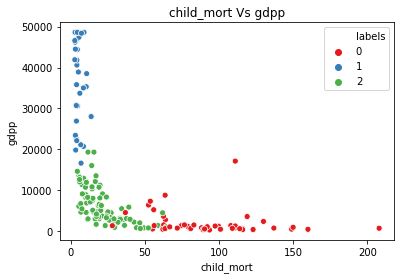

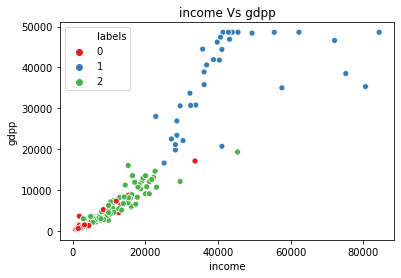

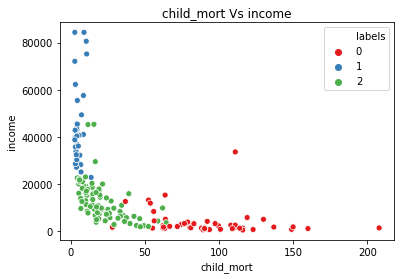

In [32]:
# Scatter Plot
# Plot 1
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'labels', data = country_df, palette = 'Set1')
plt.title('child_mort Vs gdpp')
plt.show()

# Plot 2
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'labels', data = country_df, palette = 'Set1')
plt.title('income Vs gdpp')
plt.show()

# Plot 3
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'labels', data = country_df, palette = 'Set1')
plt.title('child_mort Vs income')
plt.show()

##### Observations
- Even scatter plot suggets same pattern for Countries under label 0 and 2 like
     - Lower GDPP, Higher Child Mortality rate per 1000 child(age <5).
     - Lower GDPP, Lower Income per Capita.
     - Lower Income, Higher Child Mortality rate per 1000 child(age <5).
- And vice versa

## 4.2 Modelling using Hierarchical Clustering Algorithm

In [33]:
country_df_scaled.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291537,-0.669581,-0.629435,-0.732729,-0.851668,0.156035,-1.619092,1.902882,-0.757362
1,Albania,-0.538993,-0.542172,-0.473489,-0.472182,-0.386946,-0.314406,0.647866,-0.859973,-0.523321
2,Algeria,-0.272870,-0.475838,-0.530017,-0.560152,-0.221053,0.788991,0.670423,-0.038404,-0.498838
3,Angola,2.007831,-0.418960,-0.588935,-0.543087,-0.612045,1.387733,-1.179234,2.128151,-0.560376
4,Antigua and Barbuda,-0.695682,-0.027134,-0.150685,0.306422,0.125254,-0.604273,0.704258,-0.541946,0.013312


In [34]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,2


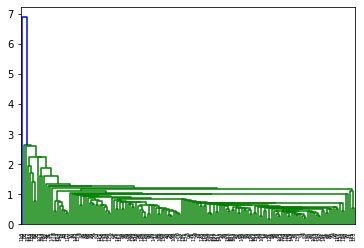

In [35]:
# applying Single Linkage
country_df_sl = linkage(country_df_scaled.drop('country', axis=1), method='single', metric='euclidean')
dendrogram(country_df_sl)
plt.show()

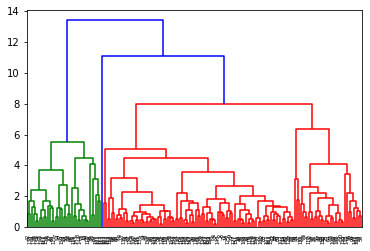

In [36]:
# applying Complete Linkage
country_df_sl = linkage(country_df_scaled.drop('country', axis=1), method='complete', metric='euclidean')
dendrogram(country_df_sl)
plt.show()

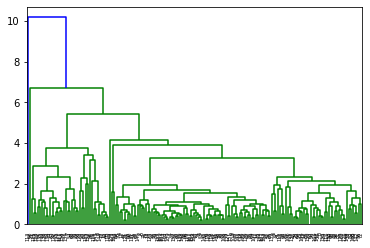

In [37]:
# applying Average Linkage
country_df_sl = linkage(country_df_scaled.drop('country', axis=1), method='average', metric='euclidean')
dendrogram(country_df_sl)
plt.show()

##### Obervations
- Ploting of all three linkages we could conclude that `Complete Linkage` gives more clear visualiztion of the data we are using by answering the question of `What should be the best k value` and after observing complete linkage ploting we could clearly say that value of k should 3 i.e. `number of clusters k = 3`.

### 4.2.1 Modelling using Hierarchical Clustering Algorithm

In [38]:
# No of Clusters k = 3
cut_tree(country_df_sl, n_clusters=3).shape

(167, 1)

In [39]:
# reshape
country_df_clusters = cut_tree(country_df_sl, n_clusters=3).reshape(-1,)
country_df_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
# assigning labels
country_df['hLabels'] = country_df_clusters
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,hLabels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,2,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,2,0


In [41]:
country_df.hLabels.value_counts()

0    165
2      1
1      1
Name: hLabels, dtype: int64

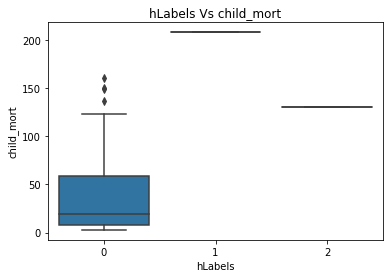

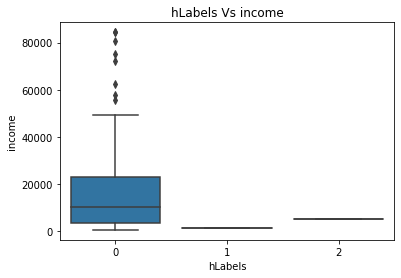

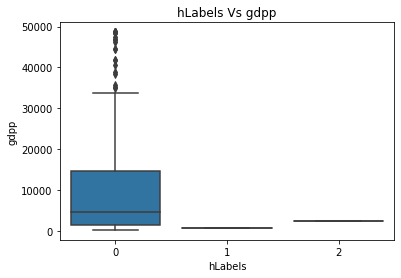

In [45]:
# Box Plot
# Plot 1
sns.boxplot(x='hLabels',y='child_mort', data=country_df)
plt.title('hLabels Vs child_mort')
plt.show()

# Plot 2
sns.boxplot(x='hLabels',y='income', data=country_df)
plt.title('hLabels Vs income')
plt.show()

# Plot 3
sns.boxplot(x='hLabels',y='gdpp', data=country_df)
plt.title('hLabels Vs gdpp')
plt.show()

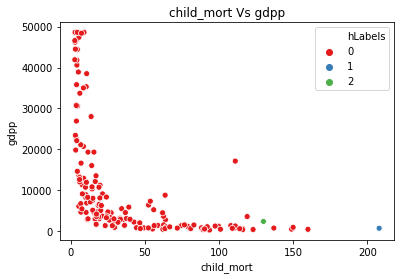

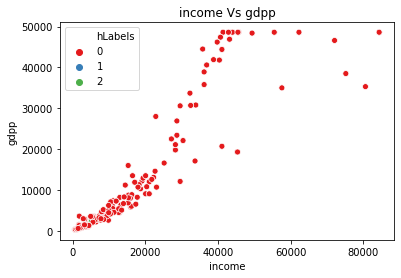

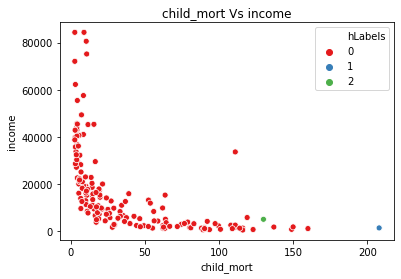

In [46]:
# Scatter Plot
# Plot 1
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'hLabels', data = country_df, palette = 'Set1')
plt.title('child_mort Vs gdpp')
plt.show()

# Plot 2
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'hLabels', data = country_df, palette = 'Set1')
plt.title('income Vs gdpp')
plt.show()

# Plot 3
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'hLabels', data = country_df, palette = 'Set1')
plt.title('child_mort Vs income')
plt.show()

# 5. Cluster Profiling

## 5.1. KMeans

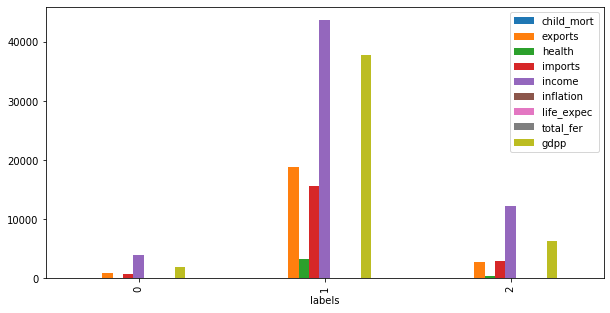

In [71]:
# Plotting mean for complete data
country_df.drop(['country','hLabels'], axis = 1).groupby('labels').mean().plot(kind = 'bar',figsize=(10,5))
plt.show()

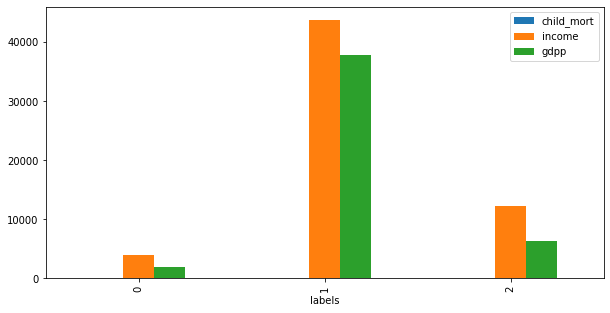

In [72]:
# Plotting mean for child_mort, income and gdpp
country_df.drop(['country','exports','health','imports','inflation',
                 'life_expec','total_fer','hLabels'],axis = 1).groupby('labels').mean().plot(kind = 'bar',figsize=(10,5))
plt.show()

#### As we can see that due to much higher values of `income` and `gdpp` we are unable to see the bar plot for `child_mort`. Hence we will try to use scaled dataframe of same data and plot the same bar plot.

In [61]:
country_df_scaled_duplicate = country_df_scaled

In [63]:
country_df_scaled_duplicate['labels'] = kmeans.labels_

In [64]:
country_df_scaled_duplicate['hLabels'] = country_df_clusters

In [65]:
country_df_scaled_duplicate.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,hLabels
0,Afghanistan,1.291537,-0.669581,-0.629435,-0.732729,-0.851668,0.156035,-1.619092,1.902882,-0.757362,0,0
1,Albania,-0.538993,-0.542172,-0.473489,-0.472182,-0.386946,-0.314406,0.647866,-0.859973,-0.523321,2,0
2,Algeria,-0.272870,-0.475838,-0.530017,-0.560152,-0.221053,0.788991,0.670423,-0.038404,-0.498838,2,0
3,Angola,2.007831,-0.418960,-0.588935,-0.543087,-0.612045,1.387733,-1.179234,2.128151,-0.560376,0,0
4,Antigua and Barbuda,-0.695682,-0.027134,-0.150685,0.306422,0.125254,-0.604273,0.704258,-0.541946,0.013312,2,0


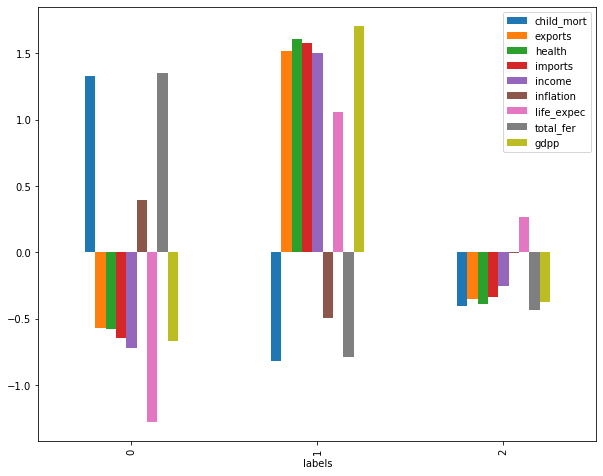

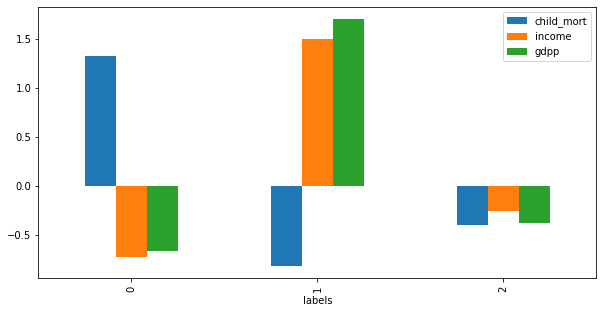

In [68]:
# Plotting mean for complete data
country_df_scaled_duplicate.drop(['country','hLabels'], axis = 1).groupby('labels').mean().plot(kind = 'bar',figsize=(10,8))
plt.show()

# Plotting mean for child_mort, income and gdpp
country_df_scaled_duplicate.drop(['country','exports','health','imports','inflation',
                 'life_expec','total_fer','hLabels'],axis = 1).groupby('labels').mean().plot(kind = 'bar',figsize=(10,5))
plt.show()

##### Observations
- Looking at both the bar plots we can clearly say that Countries under label 0 need an urgent Aid as their `child_mort`is higher, `income per capita` is lower and `gdpp` is also lower than Countries under label 1 and 2.

#### Let's find the top 5 Countries in direst need of Aid from HELP International NGO

In [70]:
country_df[country_df['labels']==0].sort_values(by=['gdpp','income','child_mort'], ascending=[True, True, False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,hLabels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231,0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327,0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334,0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348,0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399,0,0


## 5.2.  Heirarchical Clustering

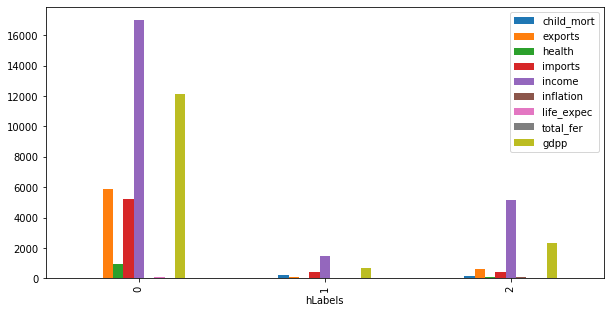

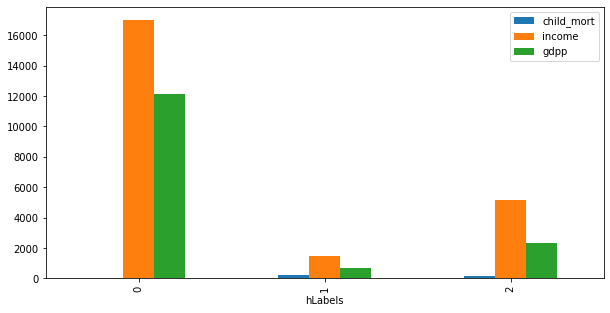

In [74]:
# Plotting mean for complete data
country_df.drop(['country','labels'], axis = 1).groupby('hLabels').mean().plot(kind = 'bar',figsize=(10,5))
plt.show()

# Plotting mean for child_mort, income and gdpp
country_df.drop(['country','exports','health','imports','inflation',
                 'life_expec','total_fer','labels'],axis = 1).groupby('hLabels').mean().plot(kind = 'bar',figsize=(10,5))
plt.show()

#### As we can see that due to much higher values of `income` and `gdpp` we are unable to see the bar plot for `child_mort`. Hence we will try to use scaled dataframe of same data and plot the same bar plot.

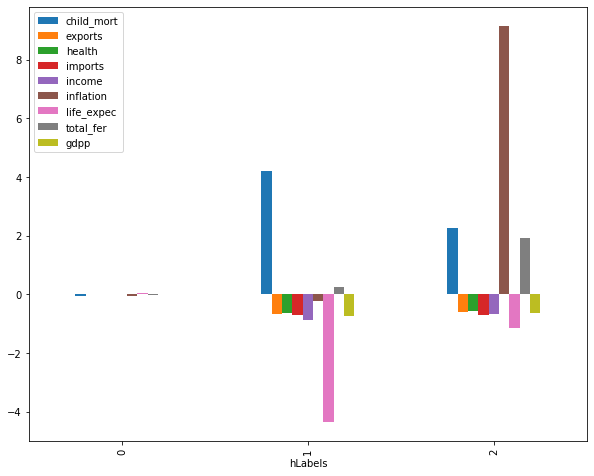

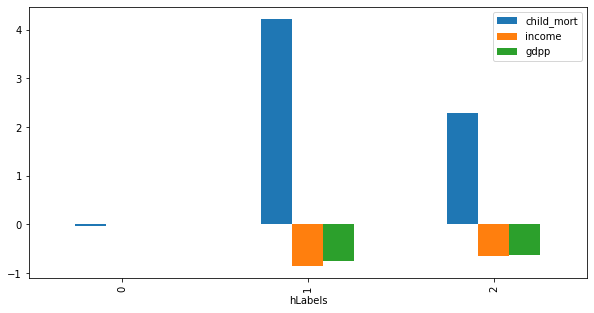

In [75]:
# Plotting mean for complete data
country_df_scaled_duplicate.drop(['country','labels'], axis = 1).groupby('hLabels').mean().plot(kind = 'bar',figsize=(10,8))
plt.show()

# Plotting mean for child_mort, income and gdpp
country_df_scaled_duplicate.drop(['country','exports','health','imports','inflation',
                 'life_expec','total_fer','labels'],axis = 1).groupby('hLabels').mean().plot(kind = 'bar',figsize=(10,5))
plt.show()

##### Observations
- In Hierarchical clustering Bar Plotting we can see that the label 1 has higher `child_mort` rate, lower `income` and `gdpp` which suggest that the Countries under Label 1 should be considered for direst Aid on extreme urgent basis. 
- But there is a catch in this as there are only one values under lable 1 and 2 we cannot choose them on the basis of visualization due to insuffient values labelled under them.
- Hence we will select those countries having higher `child_mort` rate, lower `income` and `gdpp` but in the label 0.

#### Let's see which countries according to Hierarchical clustering under lable 1 need most attention regarding Aid from HELP International NGO

In [77]:
country_df[country_df['hLabels']==0].sort_values(by=['gdpp','income','child_mort'], ascending=[True, True, False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,hLabels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231,0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327,0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334,0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348,0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399,0,0


# 6. Final Suggestion to the CEO of HELP International NGO

#### On the basis of the KMeans and Hierarchical model buliding I would suggest to provide an urgent AID to countries
- `Burundi`
- `Liberia`
- `Congo, Dem. Rep.`
- `Niger`
- `Sierra Leone`